# Background
Dataset: https://www.takakura.com/Kyoto_data/new_data201704/

In [1]:
# Necessary imports
import pandas as pd
import os
import warnings
from shutil import rmtree
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import ipaddress
import numpy as np
from scipy.sparse import csc_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif

# Pre-processing

### Converting the data from txt format to CSV format to make the data easier to work with

In [ ]:
# Since our data has mixed attribute types, we suppress the pandas warning regarding it
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# From the data documentation
columns = [
    "Duration (seconds)",
    "Service Type",
    "Source bytes",
    "Destination bytes",
    "Count",
    "Same srv rate",
    "Serror rate",
    "Srv serror rate",
    "Dst host count",
    "Dst host srv count",
    "Dst host same src port rate",
    "Dst host serror rate",
    "Dst host srv serror rate",
    "Flag",
    "IDS detection",
    "Malware detection",
    "Ashula detection",
    "Label",
    "Source IP Address",
    "Source Port Number",
    "Destination IP Address",
    "Destination Port Number",
    "Start Time",
    "Protocol"
]

month_encoder = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Since we're iterating through all months in the year
for month in range(6, 7): #note: just start with first month (for testing), instead of (1,13)
    print(f"Creating {month_encoder[month]}.csv...")
    output_file = f"Data/CSVs/{month_encoder[month]}.csv"
    if month < 10:
        str_month = "0"+str(month)    # Since months are 2 digits in the file structure
    else:
        str_month = str(month)
    
    for data_file in os.listdir(f"Data/{str(str_month)}"):
        print(f"Processing File: {data_file}")
        file_path = os.path.join(f"Data/{str(str_month)}", data_file)
        # Read the TXT using tab delimiters since that's how it's structured
        day_data = pd.read_csv(file_path, delimiter="\t", names=columns, index_col=False)
        # If [month].csv doesn't exist yet, create it
        if not os.path.exists(output_file):
            day_data.to_csv(output_file, mode='w', header=True, index=False)
        # Or else append to it
        else:
            day_data.to_csv(output_file, mode='a', header=False, index=False)

Creating June.csv...
Processing File: 20150601.txt
Processing File: 20150602.txt
Processing File: 20150603.txt
Processing File: 20150604.txt
Processing File: 20150605.txt


In [50]:
# Since our data has mixed attribute types, we suppress the pandas warning regarding it
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# From the data documentation
columns = [
    "Duration (seconds)",
    "Service Type",
    "Source bytes",
    "Destination bytes",
    "Count",
    "Same srv rate",
    "Serror rate",
    "Srv serror rate",
    "Dst host count",
    "Dst host srv count",
    "Dst host same src port rate",
    "Dst host serror rate",
    "Dst host srv serror rate",
    "Flag",
    "IDS detection",
    "Malware detection",
    "Ashula detection",
    "Label",
    "Source IP Address",
    "Source Port Number",
    "Destination IP Address",
    "Destination Port Number",
    "Start Time",
    "Protocol"
]

month_encoder = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

In [93]:
#file_path = '/Users/britneyjaculina/Desktop/SJSU/CMPE255Project/Data/CSVs/01/January.csv'
#file_path = '/Users/mitko/Desktop/255_Project/data/CSVs/January.csv'
file_path = 'Data/CSVs/January.csv'

folder_path = os.path.dirname(file_path)

# loop through the month
for data_file in os.listdir(folder_path):
    print(f"Processing File: {data_file}")
    file_path = os.path.join(folder_path, data_file)
    day_data = pd.read_csv(file_path, delimiter=",", index_col=False)

    print("Columns in the data:", day_data.columns)

    # Break to only read one day's data
    break

Processing File: January.csv
Columns in the data: Index(['Duration (seconds)', 'Service Type', 'Source bytes',
       'Destination bytes', 'Count', 'Same srv rate', 'Serror rate',
       'Srv serror rate', 'Dst host count', 'Dst host srv count',
       'Dst host same src port rate', 'Dst host serror rate',
       'Dst host srv serror rate', 'Flag', 'IDS detection',
       'Malware detection', 'Ashula detection', 'Label', 'Source IP Address',
       'Source Port Number', 'Destination IP Address',
       'Destination Port Number', 'Start Time', 'Protocol'],
      dtype='object')


In [94]:
day_data.columns

Index(['Duration (seconds)', 'Service Type', 'Source bytes',
       'Destination bytes', 'Count', 'Same srv rate', 'Serror rate',
       'Srv serror rate', 'Dst host count', 'Dst host srv count',
       'Dst host same src port rate', 'Dst host serror rate',
       'Dst host srv serror rate', 'Flag', 'IDS detection',
       'Malware detection', 'Ashula detection', 'Label', 'Source IP Address',
       'Source Port Number', 'Destination IP Address',
       'Destination Port Number', 'Start Time', 'Protocol'],
      dtype='object')

In [95]:
# getting 5000 random samples from month
day_data = day_data.sample(n = 5000, random_state = 42)

## Inspecting the data

Inspection of data for January:
Data Attributes:

Duration (seconds)	|	Service Type	|	Source bytes	|	Destination bytes	|	Count	|	Same srv rate
Serror rate	|	Srv serror rate	|	Dst host count	|	Dst host srv count	|	Dst host same src port rate	|	Dst host serror rate
Dst host srv serror rate	|	Flag	|	IDS detection	|	Malware detection	|	Ashula detection	|	Label
Source IP Address	|	Source Port Number	|	Destination IP Address	|	Destination Port Number	|	Start Time	|	Protocol


First five rows of the dataset for this day:
          Duration (seconds) Service Type  Source bytes  Destination bytes  \
8593421             0.000388          dns            59                106   
5410561             0.000000        other             0                  0   
6077743             0.000000        other             0                  0   
10719841            0.000422          dns            44                104   
10986805            0.000000        other             0                  0   

          C

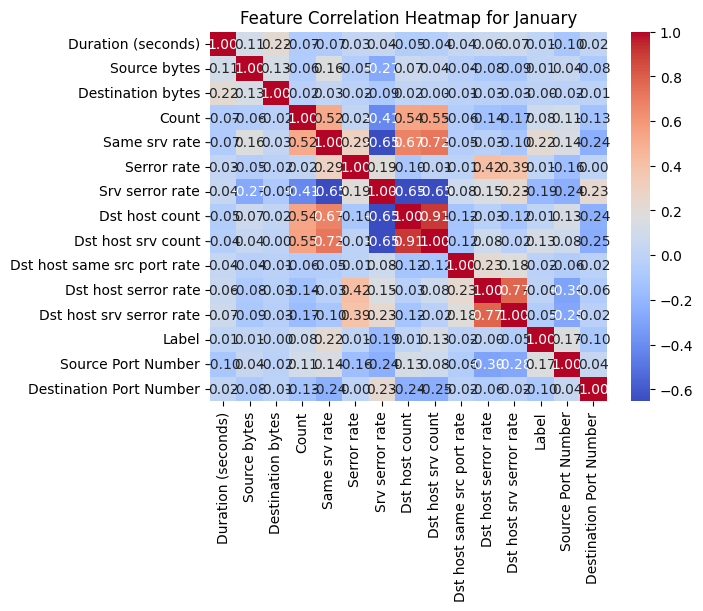

In [96]:
def inspect_data(day_data, month):
    print("Inspection of data for " + month + ":")
    print("Data Attributes:\n")
    attributes = day_data.columns.tolist()
    for i in range(0, len(attributes), 6):
        print("\t|\t".join(attributes[i:i+6]))

    print("\n\nFirst five rows of the dataset for this day:")
    with pd.option_context('display.max_columns', 10):
        print(day_data.head(5))

    for column in day_data.select_dtypes(include='number').columns:
        print(f"\nStatistics for Numerical Feature {column}:")
        print(day_data[column].describe())

    # check for missing values
    for column in day_data.columns:
        missing_count = day_data[column].isnull().sum()
        print(f"Column '{column}' has {missing_count} missing values")

    # check for unique values
    for column in day_data.select_dtypes(include='object').columns:
        unique_values = day_data[column].nunique()
        print(f"Unique values in {column}: {unique_values}")

    print("\nCorrelation Matrix:")
    correlation_matrix = day_data.select_dtypes(include='number').corr()
    sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Feature Correlation Heatmap for {month}")
    plt.show()

if day_data.empty:
    print("The data for the selected day is empty")
else:
    inspect_data(day_data, month="January")


### Encode The Data Before Split

In [2]:
data = pd.read_csv("/Users/britneyjaculina/Desktop/SJSU/CMPE255Project/Data/CSVs/01/January.csv", index_col = False) #load only January dataset for initial testing
#data = pd.read_csv("Data/CSVs/January.csv", index_col = False) #load only January dataset for initial testing
data = data.sample(n = 5000, random_state=42) # Sample 5000 from January

/var/folders/2m/6qm4vppd2z3_sjyvr5d79t7m0000gn/T/ipykernel_7952/2548323914.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/britneyjaculina/Desktop/SJSU/CMPE255Project/Data/CSVs/01/January.csv", index_col = False) #load only January dataset for initial testing


In [3]:
# network prefix grouping encoding
# note: categorize the data based on the network address
def extract_ipv6_net(ip_addr, net_len=64):
    ip = ipaddress.IPv6Address(ip_addr)
    ip_int = int(ip)

    mask = (1 << (128-net_len)) - 1 # mask = 111...1111 (64)
    prefixBits = ip_int & ~mask # keep the network portion (clearing subnet)
    return ipaddress.IPv6Address(prefixBits)   

#data["Source IP Address"] = data["Source IP Address"].apply(lambda x: extract_ipv6_net(x))
#print(data[["Source IP Address", "Destination IP Address"]].head())

# categorizing the Source/Destination IP addresses (vectorize the function, faster than .apply)
vectorized_extract = np.vectorize(extract_ipv6_net)
data["Source IP Address"] = vectorized_extract(data["Source IP Address"])
data["Destination IP Address"] = vectorized_extract(data["Destination IP Address"])

print(data["Source IP Address"].head())
#print(extract_ipv6_net("fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044"))

8593421     fd95:ec1e:6a61:df6b::
5410561     fd95:ec1e:6a61:e2d2::
6077743     fd95:ec1e:6a61:f96c::
10719841    fd95:ec1e:6a61:df6b::
10986805    fd95:ec1e:6a61:c226::
Name: Source IP Address, dtype: object


In [4]:
# Label: indicates whether the session was attack or not; ‘1’ means the session was normal
# note: when categorizing if the data is attack data, 1 = attack, 0 = not attack
"""data["is_attack"] = data["Label"].apply(lambda x: 1 if x != 1 else 0)

# Count occurrences of 0 in "is_attack"
nonAttackCount = (data["is_attack"] == 0).sum()
attackCount = (data["is_attack"] == 1).sum()
print(data.shape) # 1.24m records, 24 attributes
print(f"Attack records: {attackCount}, Non attack records: {nonAttackCount}")"""

# encodes the non numerical attributes
# note: numerical attributes still need to be normalized
def encode_data(data):
    attributes = ["Service Type", "Flag", "Protocol"] #"Source IP Address","Destination IP Address", "Protocol"]#"Start Time", "Protocol"]
    df = pd.DataFrame(data)
    
    encoder = OneHotEncoder(sparse_output=True, drop="first")
    encoded_attr = encoder.fit_transform(df[attributes])
    encoded_columns = encoder.get_feature_names_out(attributes)

    # drop original categorical columns
    df = df.drop(columns=attributes).reset_index(drop=True)
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_attr, columns=encoded_columns)
    df = pd.concat([df, encoded_df], axis=1)
    return df

enc_data = encode_data(data)
print(enc_data.head())

   Duration (seconds)  Source bytes  Destination bytes  Count  Same srv rate  \
0            0.000388            59                106     15            1.0   
1            0.000000             0                  0      0            0.0   
2            0.000000             0                  0      0            0.0   
3            0.000422            44                104      9            1.0   
4            0.000000             0                  0      0            0.0   

   Serror rate  Srv serror rate  Dst host count  Dst host srv count  \
0          0.0             0.00              15                  32   
1          0.0             0.93               0                   0   
2          0.0             1.00               0                   0   
3          0.0             0.00              93                 100   
4          0.0             0.91               0                   0   

   Dst host same src port rate  ...  Flag_RSTR  Flag_RSTRH Flag_S0 Flag_S1  \
0             

In [5]:
enc_data.head()

,Duration (seconds),Source bytes,Destination bytes,Count,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,...,Flag_RSTR,Flag_RSTRH,Flag_S0,Flag_S1,Flag_S2,Flag_SF,Flag_SH,Flag_SHR,Protocol_tcp,Protocol_udp
0,0.000388,59,106,15,1.0,0.0,0.00,15,32,0.0,...,0,0,0,0,0,1.0,0,0,0,1.0
1,0.000000,0,0,0,0.0,0.0,0.93,0,0,0.0,...,0,0,0,0,0,0,0,0,1.0,0
2,0.000000,0,0,0,0.0,0.0,1.00,0,0,0.0,...,0,0,1.0,0,0,0,0,0,1.0,0
3,0.000422,44,104,9,1.0,0.0,0.00,93,100,0.0,...,0,0,0,0,0,1.0,0,0,0,1.0
4,0.000000,0,0,0,0.0,0.0,0.91,0,0,0.0,...,0,0,1.0,0,0,0,0,0,1.0,0


In [6]:
print(enc_data.columns)

Index(['Duration (seconds)', 'Source bytes', 'Destination bytes', 'Count',
       'Same srv rate', 'Serror rate', 'Srv serror rate', 'Dst host count',
       'Dst host srv count', 'Dst host same src port rate',
       'Dst host serror rate', 'Dst host srv serror rate', 'IDS detection',
       'Malware detection', 'Ashula detection', 'Label', 'Source IP Address',
       'Source Port Number', 'Destination IP Address',
       'Destination Port Number', 'Start Time', 'Service Type_http',
       'Service Type_other', 'Service Type_radius', 'Service Type_rdp',
       'Service Type_sip', 'Service Type_smtp', 'Service Type_snmp',
       'Service Type_ssh', 'Flag_REJ', 'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR',
       'Flag_RSTRH', 'Flag_S0', 'Flag_S1', 'Flag_S2', 'Flag_SF', 'Flag_SH',
       'Flag_SHR', 'Protocol_tcp', 'Protocol_udp'],
      dtype='object')


### Mutual Information

In [7]:
# Assign y column as 'Label'
X = enc_data.drop(columns=["Label"])
y = enc_data["Label"]

In [8]:
print(X.dtypes)

Duration (seconds)                        float64
Source bytes                                int64
Destination bytes                           int64
Count                                       int64
Same srv rate                             float64
Serror rate                               float64
Srv serror rate                           float64
Dst host count                              int64
Dst host srv count                          int64
Dst host same src port rate               float64
Dst host serror rate                      float64
Dst host srv serror rate                  float64
IDS detection                              object
Malware detection                          object
Ashula detection                           object
Source IP Address                          object
Source Port Number                          int64
Destination IP Address                     object
Destination Port Number                     int64
Start Time                                 object


#### To run mutual information, the X data types need to be numerical values. Therefore, the following cells are to handle the sparsity and conversion to calculate mutual information

In [9]:
# check for missing values
columns_with_missing_values = X.columns[X.isnull().any()]

print(columns_with_missing_values)

Index([], dtype='object')


In [10]:
# converts IDS detection, Malware detection, Ashula detection from object to int

def encode_MI1(x):
    return 0 if x == 0 else 1

X[['IDS detection', 'Malware detection', 'Ashula detection']] = X[['IDS detection', 'Malware detection', 'Ashula detection']].map(encode_MI1)

In [11]:
print(X.dtypes)

Duration (seconds)                        float64
Source bytes                                int64
Destination bytes                           int64
Count                                       int64
Same srv rate                             float64
Serror rate                               float64
Srv serror rate                           float64
Dst host count                              int64
Dst host srv count                          int64
Dst host same src port rate               float64
Dst host serror rate                      float64
Dst host srv serror rate                  float64
IDS detection                               int64
Malware detection                           int64
Ashula detection                            int64
Source IP Address                          object
Source Port Number                          int64
Destination IP Address                     object
Destination Port Number                     int64
Start Time                                 object


In [12]:
# dropping Source IP Address, Destination IP Address, Start Time

X = X.drop(columns=['Source IP Address', 'Destination IP Address', 'Start Time'])
print(X.dtypes)

Duration (seconds)                        float64
Source bytes                                int64
Destination bytes                           int64
Count                                       int64
Same srv rate                             float64
Serror rate                               float64
Srv serror rate                           float64
Dst host count                              int64
Dst host srv count                          int64
Dst host same src port rate               float64
Dst host serror rate                      float64
Dst host srv serror rate                  float64
IDS detection                               int64
Malware detection                           int64
Ashula detection                            int64
Source Port Number                          int64
Destination Port Number                     int64
Service Type_http              Sparse[float64, 0]
Service Type_other             Sparse[float64, 0]
Service Type_radius            Sparse[float64, 0]


In [13]:
# X has sparse arrays, therefore use csc_matrix
X_csc = csc_matrix(X)

mutual_info = mutual_info_classif(X_csc, y)
print(mutual_info)

[1.53487348e-01 9.70350666e-02 1.18744192e-01 4.02904854e-02
 3.19927133e-02 2.28398811e-02 4.37435121e-02 9.11106262e-02
 5.71826666e-02 2.89256735e-03 9.12488110e-02 7.47804598e-02
 0.00000000e+00 4.46629461e-05 6.59643727e-04 3.19563269e-01
 8.45494591e-02 4.38459391e-05 6.25780498e-02 2.19206521e-05
 1.31593475e-04 2.12786555e-04 5.99611343e-04 1.31593475e-04
 5.14275024e-04 3.29573787e-03 8.12363909e-11 1.97452889e-04
 1.53541965e-04 3.73282763e-04 2.93485814e-02 1.31593475e-04
 2.19206521e-05 2.70559253e-02 2.19206521e-05 1.38139063e-02
 4.81619387e-02 4.47900167e-02]


/Users/britneyjaculina/VirtualBox VMs/python_env/cmpe257/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/britneyjaculina/VirtualBox VMs/python_env/cmpe257/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/britneyjaculina/VirtualBox VMs/python_env/cmpe257/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/britneyjaculina/VirtualBox VMs/python_env/cmpe257/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: U

In [14]:
mutual_infoDF = pd.DataFrame({
    'Feature': X.columns, 
    'Mutual Info': mutual_info  
})

mutual_infoDF = mutual_infoDF.sort_values(by='Mutual Info', ascending=False)

print("Total features:" ,mutual_infoDF.shape[0])
print(mutual_infoDF[['Feature', 'Mutual Info']])

Total features: 38
                        Feature   Mutual Info
15           Source Port Number  3.195633e-01
0            Duration (seconds)  1.534873e-01
2             Destination bytes  1.187442e-01
1                  Source bytes  9.703507e-02
10         Dst host serror rate  9.124881e-02
7                Dst host count  9.111063e-02
16      Destination Port Number  8.454946e-02
11     Dst host srv serror rate  7.478046e-02
18           Service Type_other  6.257805e-02
8            Dst host srv count  5.718267e-02
36                 Protocol_tcp  4.816194e-02
37                 Protocol_udp  4.479002e-02
6               Srv serror rate  4.374351e-02
3                         Count  4.029049e-02
4                 Same srv rate  3.199271e-02
30                      Flag_S0  2.934858e-02
33                      Flag_SF  2.705593e-02
5                   Serror rate  2.283988e-02
35                     Flag_SHR  1.381391e-02
25                     Flag_REJ  3.295738e-03
9   Dst host sa

### Determining which features to keep/drop based on Mutual Information

In [15]:
# total mutual info
mutual_infoDF['Total MI'] = mutual_infoDF['Mutual Info'].cumsum()
total_mi = mutual_infoDF['Mutual Info'].sum()

print(total_mi)

1.4617648587232488


In [16]:
# threshold to select features that contribute to 90% of the sum MI
threshold = 0.9 * total_mi
print(threshold)

1.315588372850924


In [17]:
drop_features_MI = mutual_infoDF[mutual_infoDF['Total MI'] > threshold]

In [19]:
print("The # of features dropped after mutual info:", drop_features_MI.shape[0])

print("\nThe features dropped after mutual info")
print(drop_features_MI[['Feature', 'Mutual Info']])

The # of features dropped after mutual info: 25

The features dropped after mutual info
                        Feature   Mutual Info
3                         Count  4.029049e-02
4                 Same srv rate  3.199271e-02
30                      Flag_S0  2.934858e-02
33                      Flag_SF  2.705593e-02
5                   Serror rate  2.283988e-02
35                     Flag_SHR  1.381391e-02
25                     Flag_REJ  3.295738e-03
9   Dst host same src port rate  2.892567e-03
14             Ashula detection  6.596437e-04
22            Service Type_smtp  5.996113e-04
24             Service Type_ssh  5.142750e-04
29                   Flag_RSTRH  3.732828e-04
21             Service Type_sip  2.127866e-04
27                  Flag_RSTOS0  1.974529e-04
28                    Flag_RSTR  1.535420e-04
20             Service Type_rdp  1.315935e-04
31                      Flag_S1  1.315935e-04
23            Service Type_snmp  1.315935e-04
13            Malware detection  4.466

In [21]:
keep_features_MI = mutual_infoDF[mutual_infoDF['Total MI'] <= threshold]

print("The # of features to keep after mutual infor:", keep_features_MI.shape[0])

print("\nThe features to keep after mutual info")
print(keep_features_MI[['Feature', 'Mutual Info']])

The # of features to keep after mutual infor: 13

The features to keep after mutual info
                     Feature  Mutual Info
15        Source Port Number     0.319563
0         Duration (seconds)     0.153487
2          Destination bytes     0.118744
1               Source bytes     0.097035
10      Dst host serror rate     0.091249
7             Dst host count     0.091111
16   Destination Port Number     0.084549
11  Dst host srv serror rate     0.074780
18        Service Type_other     0.062578
8         Dst host srv count     0.057183
36              Protocol_tcp     0.048162
37              Protocol_udp     0.044790
6            Srv serror rate     0.043744


### Train/Test Split

In [22]:
len(enc_data["Malware detection"])

5000

In [23]:
# remove non unique columns
for col in enc_data:
    if len(enc_data[col].unique()) <= 1:
        print(f"Dropped non-unique: {col}")
        enc_data.drop(col)

#x = X

# 30/70 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 83, test_size=0.3, shuffle=True)
X_train.head()
y_train.head()

2073    1
930    -1
4302   -1
3776   -1
227    -1
Name: Label, dtype: int64

In [25]:
len(X_train)


3500

In [26]:
len(X_test)

1500

### Checking Which Features Are The Most Important

### Using permutation feature importance

Baseline Accuracy: 0.9820


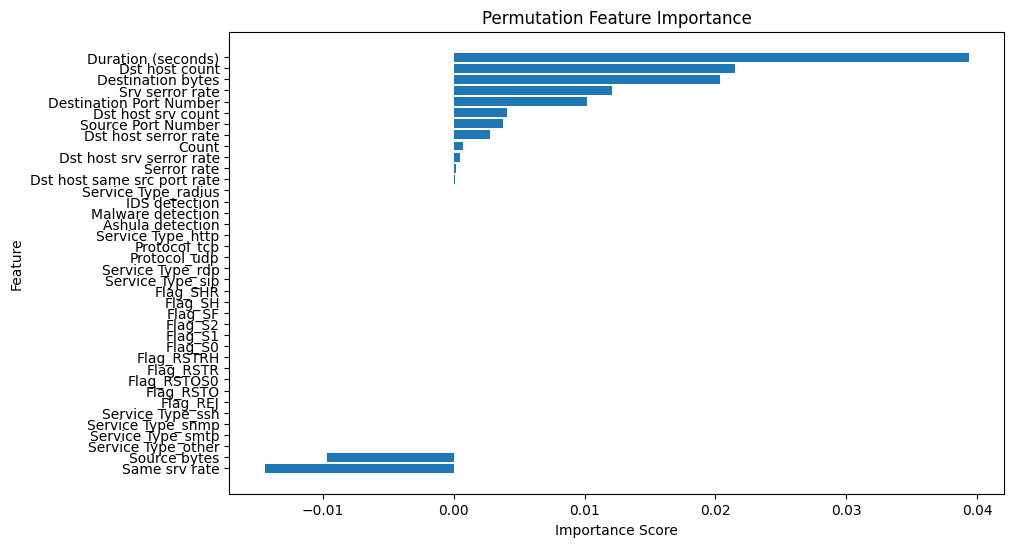

Finding features with less than 10% of the maximum feature importance...
32 features with importance less than 10% of the maximum:
                        Feature  Importance
4                 Same srv rate   -0.014467
1                  Source bytes   -0.009733
18           Service Type_other    0.000000
22            Service Type_smtp    0.000000
23            Service Type_snmp    0.000000
24             Service Type_ssh    0.000000
25                     Flag_REJ    0.000000
26                    Flag_RSTO    0.000000
27                  Flag_RSTOS0    0.000000
28                    Flag_RSTR    0.000000
29                   Flag_RSTRH    0.000000
30                      Flag_S0    0.000000
31                      Flag_S1    0.000000
32                      Flag_S2    0.000000
33                      Flag_SF    0.000000
34                      Flag_SH    0.000000
35                     Flag_SHR    0.000000
21             Service Type_sip    0.000000
20             Service Type_rdp  

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd

# apply csr_matrix
X_train_sparse = sparse.csr_matrix(X_train)
X_test_sparse = sparse.csr_matrix(X_test)

# mapping
y_train = y_train.map({-1: 1, 1: 0})
y_test = y_test.map({-1: 1, 1: 0})

# use xgboost to train
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_sparse, y_train)

y_pred = model.predict(X_test_sparse)
baseline_performance = accuracy_score(y_test, y_pred)
print(f'Baseline Accuracy: {baseline_performance:.4f}')

# temp format to run permutation importance
X_test_dense = X_test_sparse.toarray()

perm_importance = permutation_importance(model, X_test_dense, y_test, scoring='accuracy', n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})
importance_df.sort_values(by='Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

# compute 10% of the maximum importance
print("Finding features with less than 10% of the maximum feature importance...")
threshold = 0.1 * importance_df['Importance'].max()

# get features with importance less than 10% of max
low_importance_features = importance_df[importance_df['Importance'] < threshold]
print(str(len(low_importance_features))+" features with importance less than 10% of the maximum:")
print(low_importance_features)

### Determining which features to keep/drop based on Feature Importance

In [28]:
# find the features to drop and drop them from the train and test sets
features_to_drop = importance_df[importance_df['Importance'] < 0.1 * importance_df['Importance'].max()]['Feature']
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

print(str(len(X_train.columns)) + " original features")
print("\nDropped features:")
print(features_to_drop.tolist())
print(str(len(features_to_drop.tolist())) + " features dropped")

print("\nRemaining features:")
print([c for c in X_train.columns if c not in features_to_drop.tolist()])
print(str(len([c for c in X_train.columns if c not in features_to_drop.tolist()])) + " features remaining")

38 original features

Dropped features:
['Same srv rate', 'Source bytes', 'Service Type_other', 'Service Type_smtp', 'Service Type_snmp', 'Service Type_ssh', 'Flag_REJ', 'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_RSTRH', 'Flag_S0', 'Flag_S1', 'Flag_S2', 'Flag_SF', 'Flag_SH', 'Flag_SHR', 'Service Type_sip', 'Service Type_rdp', 'Protocol_udp', 'Protocol_tcp', 'Service Type_http', 'Ashula detection', 'Malware detection', 'IDS detection', 'Service Type_radius', 'Dst host same src port rate', 'Serror rate', 'Dst host srv serror rate', 'Count', 'Dst host serror rate', 'Source Port Number']
32 features dropped

Remaining features:
['Duration (seconds)', 'Destination bytes', 'Srv serror rate', 'Dst host count', 'Dst host srv count', 'Destination Port Number']
6 features remaining


### Dimensionality Reduction: Combining results from Mutual Information and Feature Importance

In [29]:
# drop features based off of feature importance
fi_features_to_drop = importance_df[importance_df['Importance'] < 0.1 * importance_df['Importance'].max()]['Feature']

print("\nFeatures dropped by feature importance:")
print(list(fi_features_to_drop))
print(str(len(list(fi_features_to_drop))) + " features")

print("\nFeatures dropped by mutual Information:")
print(list(drop_features_MI['Feature']))
print(str(len(list(drop_features_MI))) + " features")

# get union of dropped features from feature importance and mutual info and drop them
features_to_drop = list(set(fi_features_to_drop) | set(drop_features_MI['Feature']))
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

print(str(len(X_train.columns)) + " original features")
print("\nDropped features:")
print(features_to_drop)
print(str(len(features_to_drop)) + " features dropped")

print("\nRemaining features:")
print([c for c in X_train.columns if c not in features_to_drop])
print(str(len([c for c in X_train.columns if c not in features_to_drop])) + " features remaining")


Features dropped by feature importance:
['Same srv rate', 'Source bytes', 'Service Type_other', 'Service Type_smtp', 'Service Type_snmp', 'Service Type_ssh', 'Flag_REJ', 'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_RSTRH', 'Flag_S0', 'Flag_S1', 'Flag_S2', 'Flag_SF', 'Flag_SH', 'Flag_SHR', 'Service Type_sip', 'Service Type_rdp', 'Protocol_udp', 'Protocol_tcp', 'Service Type_http', 'Ashula detection', 'Malware detection', 'IDS detection', 'Service Type_radius', 'Dst host same src port rate', 'Serror rate', 'Dst host srv serror rate', 'Count', 'Dst host serror rate', 'Source Port Number']
32 features

Features dropped by mutual Information:
['Count', 'Same srv rate', 'Flag_S0', 'Flag_SF', 'Serror rate', 'Flag_SHR', 'Flag_REJ', 'Dst host same src port rate', 'Ashula detection', 'Service Type_smtp', 'Service Type_ssh', 'Flag_RSTRH', 'Service Type_sip', 'Flag_RSTOS0', 'Flag_RSTR', 'Service Type_rdp', 'Flag_S1', 'Service Type_snmp', 'Malware detection', 'Service Type_http', 'Flag_SH', 'Ser

In [30]:
print("Training features:\n")
print("X_train_reduced: ", X_train_reduced.columns.shape[0])
print("X_train_reduced: ", X_train_reduced.columns)

print("Testing features:\n")
print("X_test_reduced: ", X_test_reduced.columns.shape[0])
print("X_test_reduced: ", X_test_reduced.columns)

Training features:

X_train_reduced:  6
X_train_reduced:  Index(['Duration (seconds)', 'Destination bytes', 'Srv serror rate',
       'Dst host count', 'Dst host srv count', 'Destination Port Number'],
      dtype='object')
Testing features:

X_test_reduced:  6
X_test_reduced:  Index(['Duration (seconds)', 'Destination bytes', 'Srv serror rate',
       'Dst host count', 'Dst host srv count', 'Destination Port Number'],
      dtype='object')


# Modeling

In [121]:
def display_report(tn, fp, fn, tp):
    print(f"tn:{tn}, fp: {fp}, fn: {fn}, tp: {tp}")
    accuracy = (tp + tn)/(tn + fp + fn + tp)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    score = 2 * (precision * recall)/(precision + recall)
    
    print("Evaluation:")
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"F-1 score: {score}")

### XGBoost Classifier Modeling

In [32]:
# https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python
# https://stats.stackexchange.com/questions/243207/what-is-the-proper-usage-of-scale-pos-weight-in-xgboost-for-imbalanced-datasets
# https://xgboost.readthedocs.io/en/stable/parameter.html
# https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

parameter_list = {
    'n_estimators': [50, 100, 150, 200], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 6, 7, 10], 
    'scale_pos_weight': [1, 2, 5],
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0],  
}


In [33]:
xgb_model = XGBClassifier(
    eval_metric='logloss', 
    objective='binary:logistic'
)

grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=parameter_list, 
    scoring='accuracy', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7, 10],
                         'n_estimators': [50, 100, 150, 200],
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [34]:
top_parameters = grid_search.best_params_

top_parameters

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 200,
 'scale_pos_weight': 2,
 'subsample': 1.0}

In [35]:
grid_search_model = grid_search.best_estimator_

y_pred_xgb = grid_search_model.predict(X_test_reduced)


In [36]:
# compare results from the predicted y values (if it is an attack or not), to the actual attack category (y_test)
confusion_mat_RFA = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = confusion_mat_RFA.ravel()
display_report(tn, fp, fn, tp)

print("\nXGBoost Classifier Evaluation:")
print(classification_report(y_test, y_pred_xgb))

tn:133, fp: 29, fn: 13, tp: 1325
Evaluation:
accuracy: 0.972
precision: 0.9785819793205317
recall: 0.9902840059790733
F-1 score: 0.9843982169390787

XGBoost Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       162
           1       0.98      0.99      0.98      1338

    accuracy                           0.97      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.97      0.97      0.97      1500



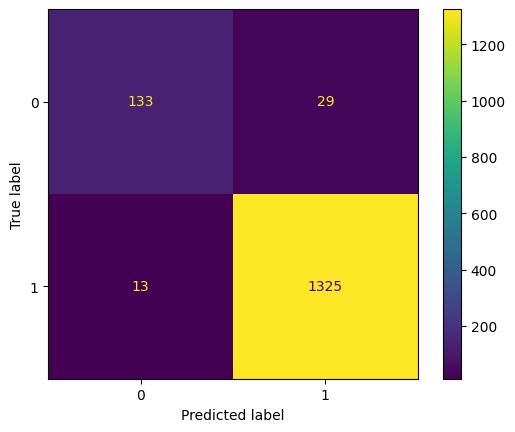

In [38]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat_RFA, display_labels = [0, 1])
cm_display.plot()
plt.show()

AUC: 0.905636


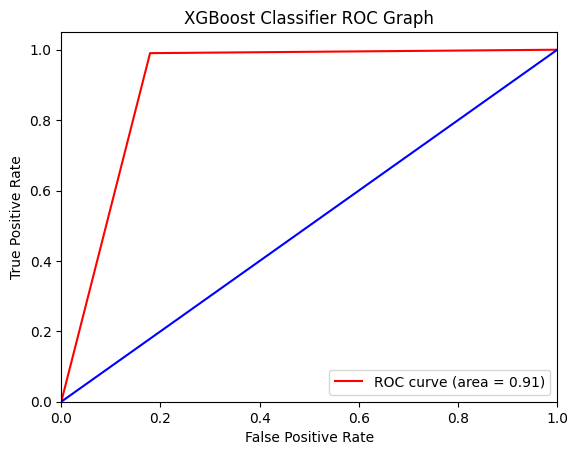

In [39]:
# https://www.geeksforgeeks.org/how-to-plot-roc-curve-in-python/

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb) 
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.6f}")

plt.figure()  
plt.plot(fpr, tpr, color = 'red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Graph')
plt.legend()
plt.show()

### Neural Network Modeling

#### Preparing the data

In [137]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
# Features and labels from X_train_reduced and y_train
X = X_train_reduced.values
y = y_train.values
# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# Reshape features into a grid (e.g., 2x3 grid for 6 features)
num_samples = X_normalized.shape[0]
grid_height, grid_width = 2, 3 # Grid size based on feature count
X_grid = X_normalized.reshape(num_samples, grid_height, grid_width, 1)
# Split data into training and validation sets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_grid, y, test_size=0.2, random_state=42, stratify=y)
# Encode labels: Map {-1, 0, 1} → {0, 1, 2}
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_nn)
y_val_encoded = label_encoder.transform(y_val_nn)
# One-hot encode labels for multi-class classification
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=3)
print(f"Training set shape: {X_train_nn.shape}")
print(f"Validation set shape: {X_val_nn.shape}")

Training set shape: (2800, 2, 3, 1)
Validation set shape: (700, 2, 3, 1)


#### Using random oversampling and data augmentation to balance the model training with the class imbalance

In [140]:
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
# Random Oversampling
minority_class_indices = np.where(y_train_encoded == 0)[0]
minority_X = X_train_nn[minority_class_indices]
minority_y = y_train_encoded[minority_class_indices]
oversampled_X = resample(minority_X, replace=True, n_samples=500, random_state=42)
oversampled_y = resample(minority_y, replace=True, n_samples=500, random_state=42)
# Combine with original data
X_train_balanced = np.concatenate((X_train_nn, oversampled_X), axis=0)
y_train_balanced = np.concatenate((y_train_encoded, oversampled_y), axis=0)
# Data Augmentation
datagen = ImageDataGenerator(
 rotation_range=10,
 width_shift_range=0.1,
 height_shift_range=0.1,
 zoom_range=0.1,
 fill_mode='nearest'
)
datagen.fit(oversampled_X)
augmented_samples, augmented_labels = [], []
for _ in range(500):
    for x_batch in datagen.flow(oversampled_X, batch_size=1):
        augmented_samples.append(x_batch[0])
        augmented_labels.append(0)
        if len(augmented_samples) >= 500:
            break
augmented_samples = np.array(augmented_samples)
augmented_labels = np.array(augmented_labels)
# Combine all augmented data
X_train_augmented = np.concatenate((X_train_balanced, augmented_samples), axis=0)
y_train_augmented = np.concatenate((y_train_balanced, augmented_labels), axis=0)
# Shuffle final dataset
X_train_final, y_train_final = shuffle(X_train_augmented, y_train_augmented, random_state=42)

#### Define the model

In [141]:
from tensorflow.keras import layers, models, regularizers
# Define CNN architecture
def build_cnn_model():
    nn_model = models.Sequential([
        # First Conv2D layer with padding to avoid negative dimensions
        layers.Conv2D(32, (2, 2), activation='relu', input_shape=(grid_height, grid_width, 1), padding='same',
        kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        # Skip pooling if grid is too small, or use global pooling
        layers.GlobalMaxPooling2D(), # Alternative to pooling for small grids
        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5), # Prevent overfitting
        # Output layer for 3 classes
        layers.Dense(3, activation='softmax')
    ])
    # Compile the model
    nn_model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    # Print the model summary
    nn_model.summary()
    return nn_model
nn_model = build_cnn_model()

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 2, 3, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

#### Train the model

In [142]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# Ensure y_train_final is one-hot encoded
y_train_final_one_hot = to_categorical(y_train_final, num_classes=3)
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = nn_model.fit(
    X_train_final, y_train_final_one_hot, # Use the augmented training data and its one-hot labels
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_one_hot), # Validation data remains the same
    callbacks=[early_stopping]
)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6068 - loss: 1.3167 - val_accuracy: 0.1014 - val_loss: 1.1950
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7796 - loss: 0.7537 - val_accuracy: 0.4143 - val_loss: 0.9606
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 0.6086 - val_accuracy: 0.4400 - val_loss: 0.8652
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8161 - loss: 0.5570 - val_accuracy: 0.4686 - val_loss: 0.9320
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8216 - loss: 0.5053 - val_accuracy: 0.8443 - val_loss: 0.5014
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.4768 - val_accuracy: 0.8471 - val_loss: 0.4266
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.4519 - val_accuracy: 0.8857 - val_loss: 0.3479
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.4505 - val_accuracy: 0.

#### Evaluate the model

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9139 - loss: 0.2718
Validation Accuracy: 0.92
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sample Predictions: [1 1 1 1 1 1 1 1 1 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.41      0.50        71
           1       0.94      0.98      0.96       629

    accuracy                           0.92       700
   macro avg       0.80      0.69      0.73       700
weighted avg       0.91      0.92      0.91       700


Confusion Matrix:
[[ 29  42]
 [ 15 614]]


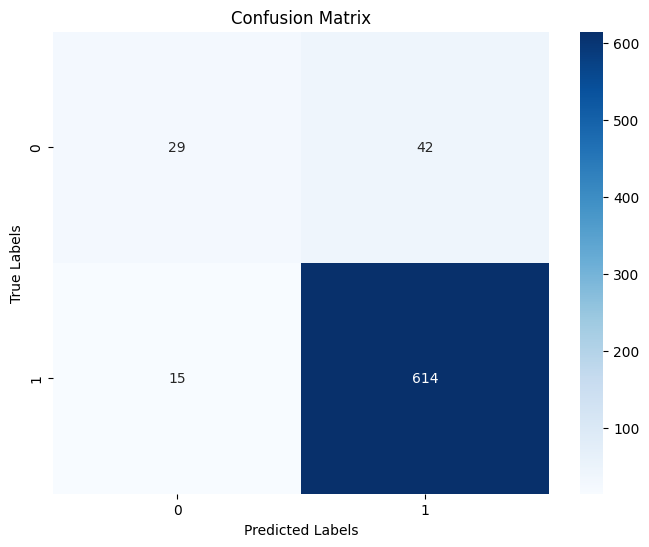

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Evaluate on validation data
val_loss, val_accuracy = nn_model.evaluate(X_val, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Predict class probabilities for the validation set
y_pred_probs = nn_model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Decode predicted labels back to original classes
y_pred_original = label_encoder.inverse_transform(y_pred_labels)

print(f"Sample Predictions: {y_pred_original[:10]}")

# Decode true validation labels
y_val_original = label_encoder.inverse_transform(np.argmax(y_val_one_hot, axis=1))

# Generate Classification Report
report = classification_report(y_val_original, y_pred_original)
print("\nClassification Report:")
print(report)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_val_original, y_pred_original)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Modeling

In [144]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", "balanced_subsample", None],
    "n_estimators": [100, 200, 500, 1000]
}
rf_classifier = RandomForestClassifier(max_depth = None)
random_search = RandomizedSearchCV(rf_classifier, params, n_iter=20, cv=3, random_state=42, pre_dispatch="2*n_jobs",n_jobs=-1, verbose=2)
random_search.fit(X_train_reduced, y_train)
best_rf_classifier = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [145]:
#rf_classifier = RandomForestClassifier(max_depth = None).fit(X_train_reduced, y_train)
y_pred = best_rf_classifier.predict(X_test_reduced) #predict based on the test data

In [146]:
from sklearn.metrics import classification_report

# compare results from the predicted y values (if it is an attack or not), to the actual attack category (y_test)
confusion_mat_RFA = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat_RFA.ravel()
display_report(tn, fp, fn, tp)

print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred))

tn:130, fp: 32, fn: 18, tp: 1320
Evaluation:
accuracy: 0.9666666666666667
precision: 0.9763313609467456
recall: 0.9865470852017937
F-1 score: 0.9814126394052044

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       162
           1       0.98      0.99      0.98      1338

    accuracy                           0.97      1500
   macro avg       0.93      0.89      0.91      1500
weighted avg       0.97      0.97      0.97      1500



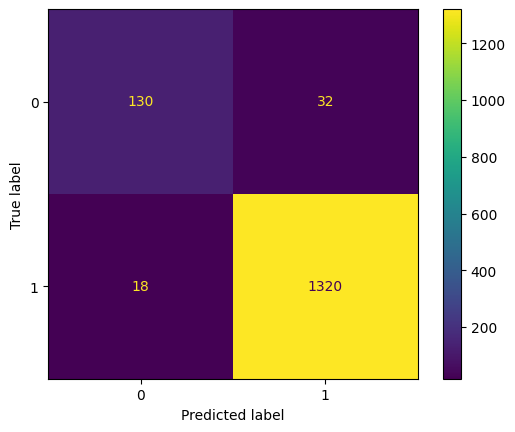

In [147]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat_RFA, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Post-processing

## Checking for overfitting using cross-validation

### XGBClassifier and Random Forest

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from scikeras.wrappers import KerasClassifier

# Custom scorer for multiclass ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)

# For Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X_train_reduced, y_train, cv=5, scoring=roc_auc_scorer)
print(f"Random Forest CV ROC AUC: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# For XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train_reduced, y_train, cv=5, scoring=roc_auc_scorer)
print(f"XGBoost CV ROC AUC: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Random Forest CV ROC AUC: 0.9710 ± 0.0192
XGBoost CV ROC AUC: 0.9709 ± 0.0154


### CNN

In [152]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier
import numpy as np

# Ensure the data is in the correct shape for the CNN
X_train_array = X_train_nn  # Already correctly shaped
y_train_one_hot_array = y_train_one_hot  # Use one-hot encoded labels

print(f"X_train: {X_train_array.shape}")
print(f"y_train: {y_train_one_hot_array.shape}")

# Wrap the CNN model for scikit-learn compatibility
nn_model_wrapper = KerasClassifier(
    build_fn=build_cnn_model, 
    epochs=10, 
    batch_size=32, 
    verbose=0
)

# Perform 5-fold cross-validation
cnn_cv_scores = cross_val_score(
    nn_model_wrapper,
    X_train_array,  # Input features
    y_train_one_hot_array,  # One-hot encoded labels
    cv=5,
    scoring='accuracy'  # Use accuracy as the scoring metric
)

# Print cross-validation results
print(f"CNN CV Accuracy: {cnn_cv_scores.mean():.4f} ± {cnn_cv_scores.std():.4f}")

X_train: (2800, 2, 3, 1)
y_train: (2800, 3)


C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 2, 3, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 2, 3, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_3               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 2, 3, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_4               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 2, 3, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_5               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 2, 3, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 2, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_6               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

CNN CV Accuracy: 0.9207 ± 0.0105


## Checking for overfitting using learning curve analysis

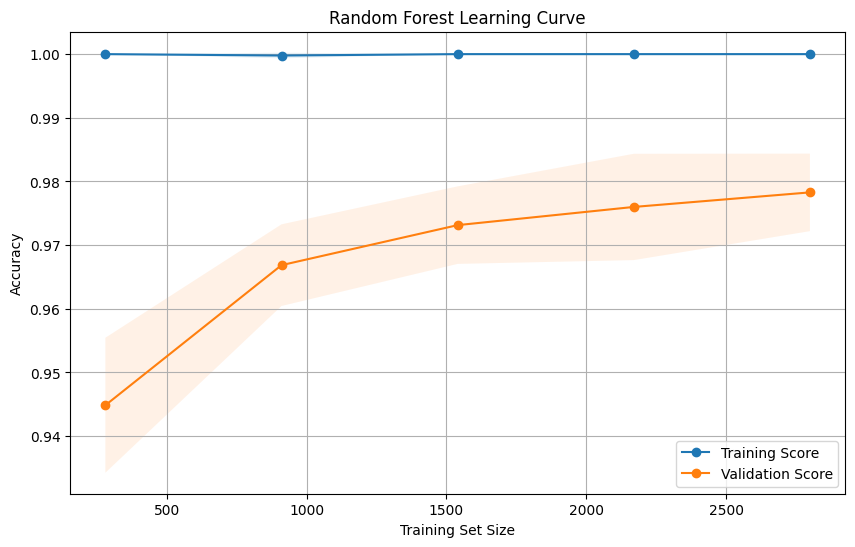

C:\Users\mitko\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


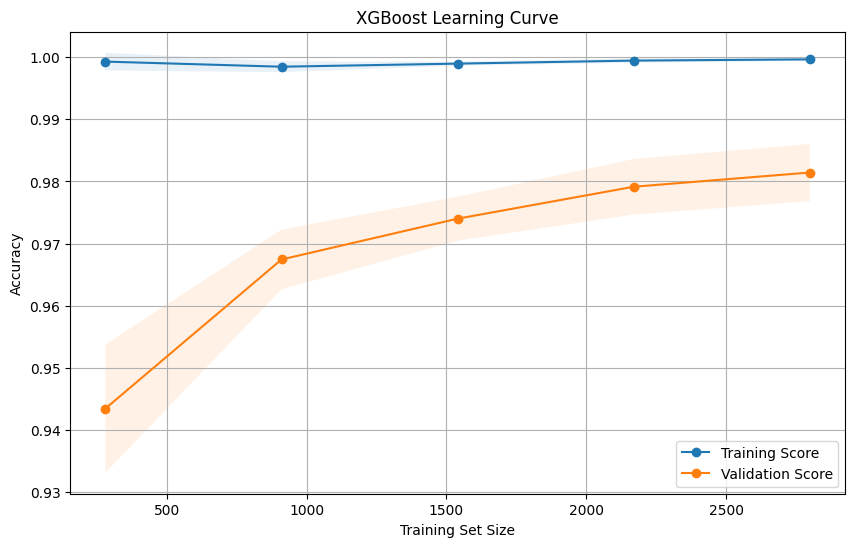

In [153]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    # Mean and standard deviation for plotting
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Score")

    plt.legend(loc="best")
    plt.show()

# Apply for RF and XGBoost
plot_learning_curve(rf_classifier, "Random Forest Learning Curve", X_train, y_train)
plot_learning_curve(xgb_model, "XGBoost Learning Curve", X_train, y_train)

## Checking for overfitting by checking class balance

In [158]:
from sklearn.metrics import classification_report

# Predictions for all models
#rf_preds = rf_classifier.predict(X_test)
#xgb_preds = xgb_model.predict(X_test)
#cnn_preds = np.argmax(nn_model.predict(X_test), axis=1)

# Classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nCNN Classification Report:")
print(classification_report(y_val_original, y_pred_original))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       162
           1       0.98      0.99      0.98      1338

    accuracy                           0.97      1500
   macro avg       0.93      0.89      0.91      1500
weighted avg       0.97      0.97      0.97      1500


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       162
           1       0.98      0.99      0.98      1338

    accuracy                           0.97      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.97      0.97      0.97      1500


CNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.41      0.50        71
           1       0.94      0.98      0.96       629

    accuracy                           0.92       700
   macro avg       0.80      0.

## Checking the ROC AUC score

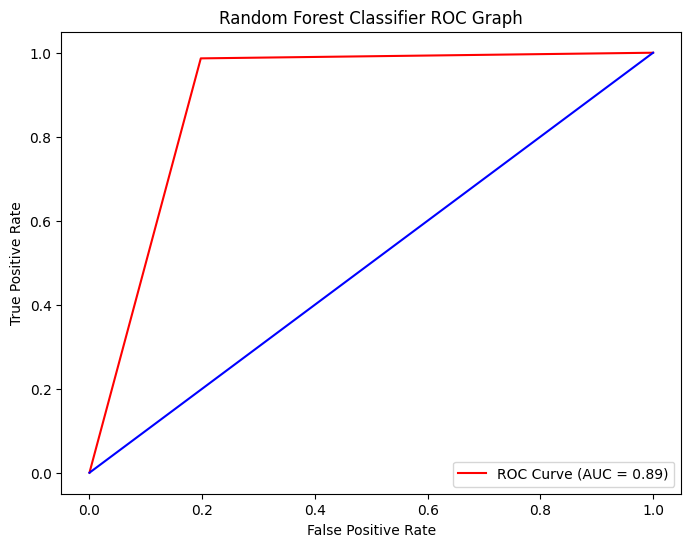

AUC: 0.905636


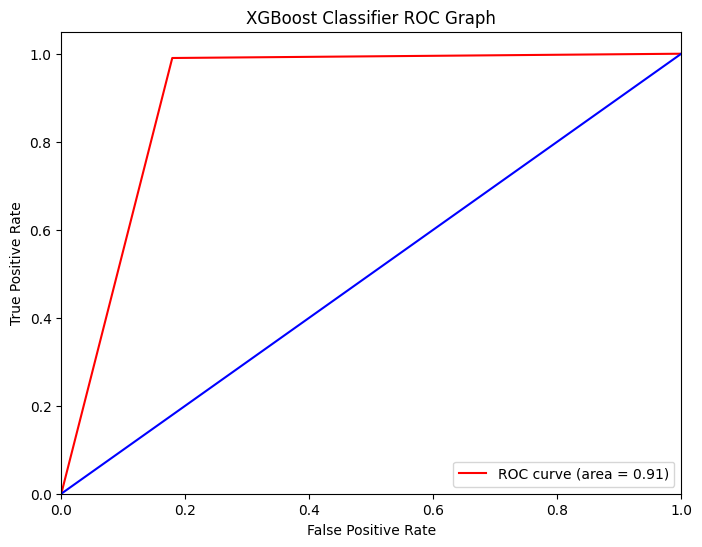

(700,)


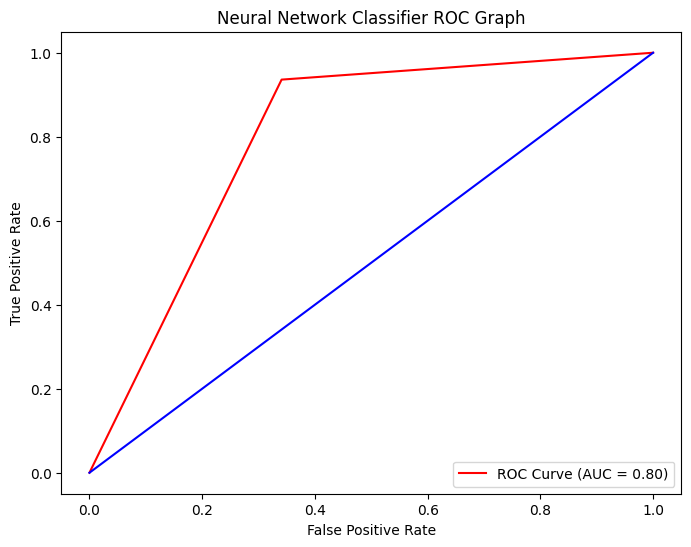

In [173]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

#Random forest
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Graph')
plt.legend(loc='lower right')
plt.show()

# XGBClassifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb) 
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.6f}")

plt.figure(figsize=(8, 6))  
plt.plot(fpr, tpr, color = 'red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Graph')
plt.legend()
plt.show()


# CNN
print(y_val_encoded.shape)
fpr, tpr, thresholds = roc_curve(y_pred_original, y_val_encoded)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network Classifier ROC Graph')
plt.legend(loc='lower right')
plt.show()